# 1: チュートリアル

In [1]:
from renom_q import *

## 計算

量子ビットと古典ビットを定義

In [2]:
q = QuantumRegister(2)     #()内はビット数
c = ClassicalRegister(2)

量子回路を定義

In [3]:
qc = QuantumCircuit(q, c)

ゲートで量子状態を変化させる

In [4]:
qc.h(q[0])      #()内はゲートを作用させるビット
qc.cx(q[0], q[1])

量子状態を観測し、古典ビットに格納

In [5]:
for i in range(2):
    qc.measure(q[i], c[i])         #(観測する量子ビット, 格納する古典ビット)

量子回路の観測を実行(測定回数は省略可)

In [6]:
r = execute(qc, shots=1000)

## 結果表示

測定結果表示(テキスト)

In [7]:
print(r)

{'00': 504, '11': 496}


測定結果表示(ヒストグラム)

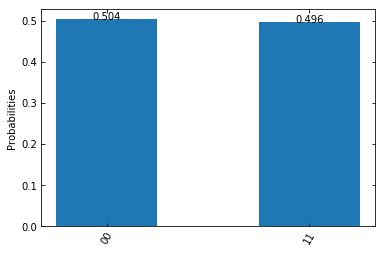

In [8]:
plot_histogram(r)

量子ビットの状態ベクトル表示

In [9]:
print(qc.Qr.qubit)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### 量子状態の変化の行列計算を表示する場合

{'00': 514, '11': 510}


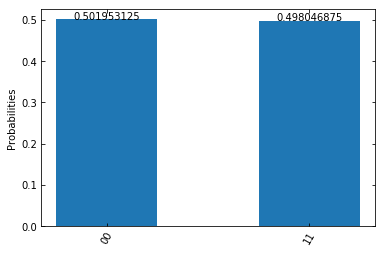

In [10]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c, set_print_matrix=True)        #set_print_matrix=Trueで計算ログを記録

qc.h(q[0])     
qc.cx(q[0], q[1])
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

In [11]:
print_matrix(qc)      #()内は表示する量子回路

---------------- result qubit ----------------
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
---------------- h(q[0]) ----------------
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]・

[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] = 

[[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]]
---------------- cx(q[0], q[1]) ----------------
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]・

[[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]] = 

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]


量子状態の変化の行列計算表示(テンソル積の計算表示も追加)

In [12]:
print_matrix(qc, tensorgate=True)      #()内は表示する量子回路

---------------- result qubit ----------------
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
---------------- h(q[0]) ----------------
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]・

[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]] = 

[[0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]]
---------------- H ⊗ I ----------------
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] ⊗ 

[[1. 0.]
 [0. 1.]] = 

[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]
---------------- cx(q[0], q[1]) ----------------
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]・

[[0.70710678+0.j]
 [0

### 量子回路を描画する場合

{'00': 512, '11': 512}


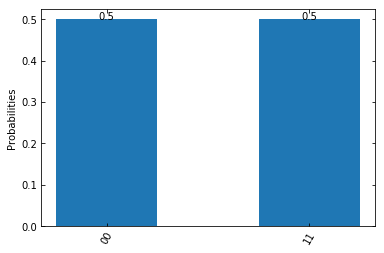

In [13]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c, set_qasm=True)        #set_qasm=Trueで量子ゲートのqasmを記録

qc.h(q[0])     
qc.cx(q[0], q[1])
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

IBMが提供する量子コンピュータ用のソフトウェア開発キット、[Qiskit](https://qiskit.org/)の描画機能を用いることで描画可能

In [14]:
from qiskit import QuantumCircuit as qiskit_qc
from qiskit.tools.visualization import circuit_drawer

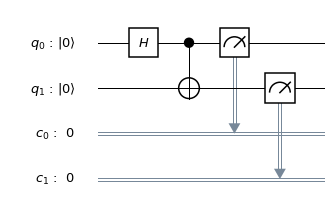

In [15]:
qasm =  qiskit_qc.from_qasm_str(qc.qasm())
circuit_drawer(qasm, output='mpl')